In [1]:
import nbimporter
import pandas as pd
import math
#import ace_tools as tools

In [3]:
from fct_usuelles import lire_graphe, afficher_graphe, visualiser_graphe_par_etape
from fct_usuelles import generate_cyclic_graph, generate_chain_graph, generate_spider_graph
from mtd_math import solver, solveur_gbp
from algo_recherche import recherche_profondeur, recherche_largeur, couverture_balle

# 1

In [4]:
# 10 sommets (3.16)
fichier = r'instances\Stranke94\Stranke94.mtx'

# 29 sommets (5.38)
#fichier = r'instances\bn-mouse_visual-cortex_1\bn-mouse_visual-cortex_1.mtx'

# 34 sommets (5,83)
#fichier = r'instances\karate\karate.mtx'

# 62 sommets (7.87)
#fichier = r'instances\dolphins\dolphins.mtx'

# 105 sommets (12.88)
#fichier = r'instances\polbooks\polbooks.mtx'

# 258 sommets (16.06)
#fichier = r'instances\sphere3\sphere3.mtx'

# 379 sommets (19.47)
#fichier = r'instances\ca-netscience\ca-netscience.mtx'

# 7057 sommets (84.005)
#fichier = r'instances\fb-pages-government\fb-pages-government.mtx'

# 11631 sommets (107.84)
#fichier = r'instances\web-wiki-crocodile\web-wiki-crocodile.mtx'

# 196 591 sommets (443.38)
#fichier = r'instances\loc-gowalla_edges\loc-gowalla_edges.mtx'

graphe = lire_graphe(fichier)

In [5]:
# Graphe cyclique (4)
#graphe = generate_cyclic_graph(16)

# Graphe en chaîne (4)
#graphe = generate_chain_graph(16)

# Graphe en étoile/spider (4.58)
#graphe = generate_spider_graph(0, leg_length=4, num_legs=5)

In [6]:
#afficher_graphe(graphe)

---

## Methode mathematique

### Mthd 1

In [7]:
sommets, cout = solver(graphe)

sommets, cout

Set parameter Username
Set parameter LicenseID to value 2601900
Academic license - for non-commercial use only - expires 2025-12-18


([8, 5, 1, 7], 4)

### Mthd 2

In [8]:
chemin, cout = solveur_gbp(graphe)

chemin, cout

([4, 5, 1], 3)

---

## Algo de recherche

In [9]:
etat_initial = {sommet: 0 for sommet in graphe}

### DFS

In [10]:
sommets_actifs_p, cout_p = recherche_profondeur(graphe, etat_initial)

print("*********** Parcours en profondeur ***********")
print("Sommets brûlés à chaque étape:", sommets_actifs_p)
print("Coût total:", cout)

*********** Parcours en profondeur ***********
Sommets brûlés à chaque étape: [3, 6]
Coût total: 3


### BFS

In [11]:
sommets_actifs_l, cout_l = recherche_largeur(graphe, etat_initial)

print("*********** Parcours en largeur ***********")
print("Sommets brûlés à chaque étape:", sommets_actifs_l)
print("Coût total:", cout)

*********** Parcours en largeur ***********
Sommets brûlés à chaque étape: [3, 6]
Coût total: 3


### Couverture des balles

In [12]:
sequence = couverture_balle(graphe)
if sequence:
    print("Solution optimale trouvée :", sequence)
    liste_triee = sorted(sequence, key=lambda x: x[1], reverse=True)
    seq = [centre for centre, rayon in liste_triee]
else:
    print("Aucune solution valide trouvée.")

Solution optimale trouvée : [(3, 3)]


In [13]:
#visualiser_graphe_par_etape(graphe, seq)


---

# 2

In [14]:
# Définition des graphes à tester
graphes = {
    "Stranke94": lire_graphe(r'instances/Stranke94/Stranke94.mtx'),
    "mouse_visual-cortex_1": lire_graphe(r'instances/bn-mouse_visual-cortex_1/bn-mouse_visual-cortex_1.mtx'),
    "karate": lire_graphe(r'instances/karate/karate.mtx'),
    "dolphins": lire_graphe(r'instances/dolphins/dolphins.mtx'),
    "polbooks": lire_graphe(r'instances/polbooks/polbooks.mtx'),
    #"sphere3": lire_graphe(r'instances/sphere3/sphere3.mtx'),
    #"ca-netscience": lire_graphe(r'instances/ca-netscience/ca-netscience.mtx'),
    "Graphe Cycle": generate_cyclic_graph(16),
    "Graphe Chaine": generate_chain_graph(16),
    "Graphe Etoile": generate_spider_graph(0, leg_length=4, num_legs=5),
}

In [15]:
# Initialisation du tableau des résultats
resultats = []

# Parcours de chaque graphe
for nom, graphe in graphes.items():
    nb_sommets = len(graphe)
    nb_aretes = sum(len(v) for v in graphe.values()) // 2  # Division par 2 car graphe non orienté
    B_max = nb_sommets ** 0.5

    # Application des algorithmes
    etat_initial = {sommet: 0 for sommet in graphe}

    try:
        solver_result, cout_s = solver(graphe)
    except Exception as e:
        solver_result, cout_s = str(e)

    try:
        chemin, cout_ss  = solveur_gbp(graphe)
    except Exception as e:
        B, chemin = None, str(e)

    try:
        sommets_actifs_p, cout_p = recherche_profondeur(graphe, etat_initial)
    except Exception as e:
        sommets_actifs_p, cout_p = str(e), None

    try:
        sommets_actifs_l, cout_l = recherche_largeur(graphe, etat_initial)
    except Exception as e:
        sommets_actifs_l, cout_l = str(e), None

    try:
        sequence_opt = couverture_balle(graphe)
        cout_bb = max([rayon for centre, rayon in sequence_opt])
    except Exception as e:
        sequence_opt = str(e)
    
    # Ajout des résultats au tableau
    resultats.append({
        "Graphe": nom,
        "V": nb_sommets,
        "E": nb_aretes,
        "B_max": B_max,
        "Solveur 1": solver_result,
        "Cout S1": cout_s,
        "Solveur GBP": chemin,
        "Cout S2": cout_ss,
        "Recherche Profondeur": sommets_actifs_p,
        "Cout RP": cout_p,
        "Recherche Largeur": sommets_actifs_l,
        "Cout RL": cout_l,
        "Sequence Optimale": sequence_opt,
        "Cout SO": cout_bb
    })


# Convertir en DataFrame et afficher
df = pd.DataFrame(resultats)

df

,Graphe,V,E,B_max,Solveur 1,Cout S1,Solveur GBP,Cout S2,Recherche Profondeur,Cout RP,Recherche Largeur,Cout RL,Sequence Optimale,Cout SO
0,Stranke94,10,21,3.162278,"[8, 5, 1, 7]",4,"[4, 5, 1]",3,"[3, 6]",3,"[3, 6]",3,"[(3, 3)]",3
1,mouse_visual-cortex_1,29,44,5.385165,"[18, 22, 7, 24, 27, 8]",6,"[12, 22, 15, 24]",4,"[9, 2, 1, 6]",4,"[1, 22, 2]",4,"[(28, 4), (10, 2)]",4
2,karate,34,78,5.830952,"[21, 32, 3, 29, 18, 16, 11]",7,"[1, 34, 3]",3,"[34, 1, 17]",3,"[1, 34]",3,"[(1, 3), (34, 2)]",3
3,dolphins,62,159,7.874008,"[22, 54, 18, 34, 11, 41, 29, 45, 20]",9,"[37, 14, 30, 49]",4,"[15, 46, 18, 42, 61]",5,"[15, 18, 33]",4,"[(9, 4), (14, 3)]",4
4,polbooks,105,441,10.246951,"[95, 62, 43, 82, 25, 68, 34, 8, 3, 7, 17]",11,"[29, 12, 36, 82]",4,"[9, 85, 72, 105]",5,"[2, 31, 36]",4,"[(4, 4), (31, 3)]",4
5,Graphe Cycle,16,16,4.000000,"[4, 11, 14, 1, 3]",5,"[4, 11, 14, 1, 3]",5,"[0, 2, 4, 6, 8, 10]",6,"[0, 2, 6, 10]",5,"[(4, 5), (12, 4)]",5
6,Graphe Chaine,16,15,4.000000,"[4, 11, 14, 1, 3]",5,"[4, 11, 14, 1, 3]",5,"[1, 3, 5, 7, 9, 11, 13, 15]",8,"[0, 4, 10, 14]",5,"[(11, 5), (3, 4)]",5
7,Graphe Etoile,21,20,4.582576,"[2, 0, 11, 15, 1, 14]",6,"[0, 5, 16, 18, 1]",5,"[0, 2, 7, 12]",5,"[0, 2, 4, 8]",5,"[(0, 5)]",5


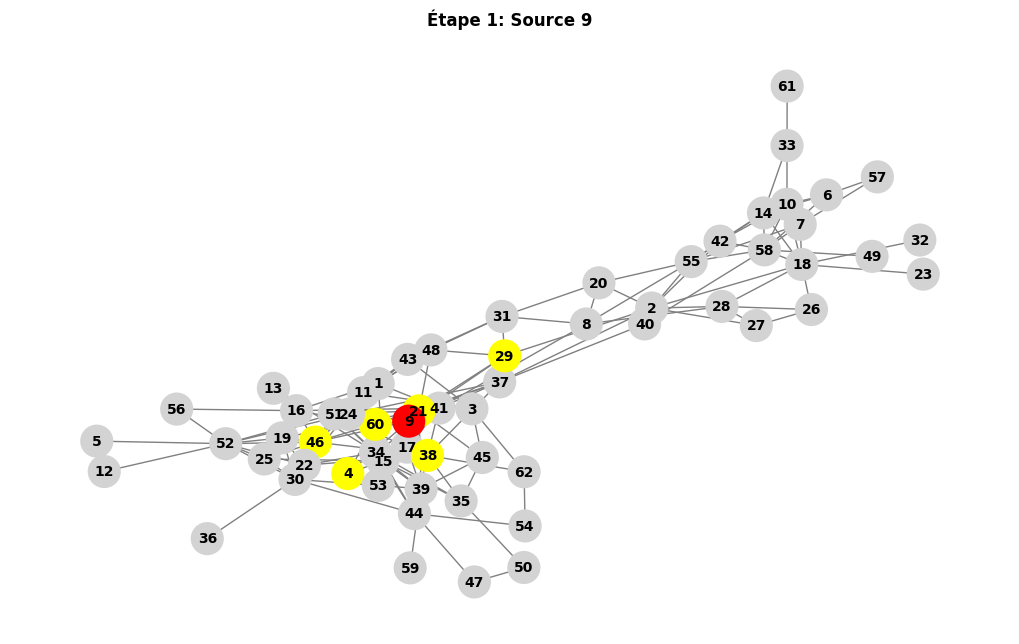

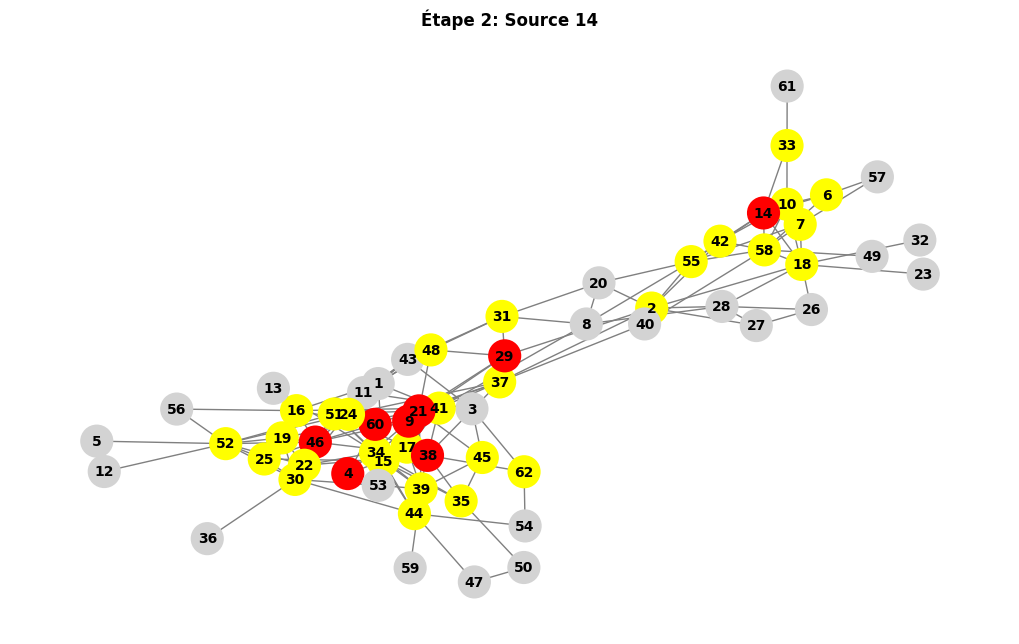

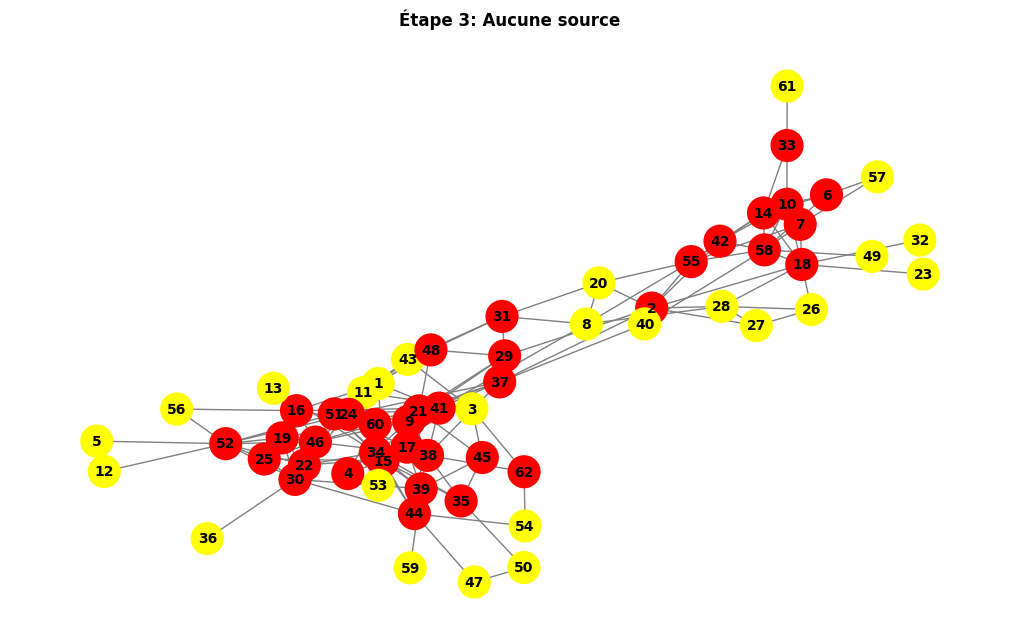

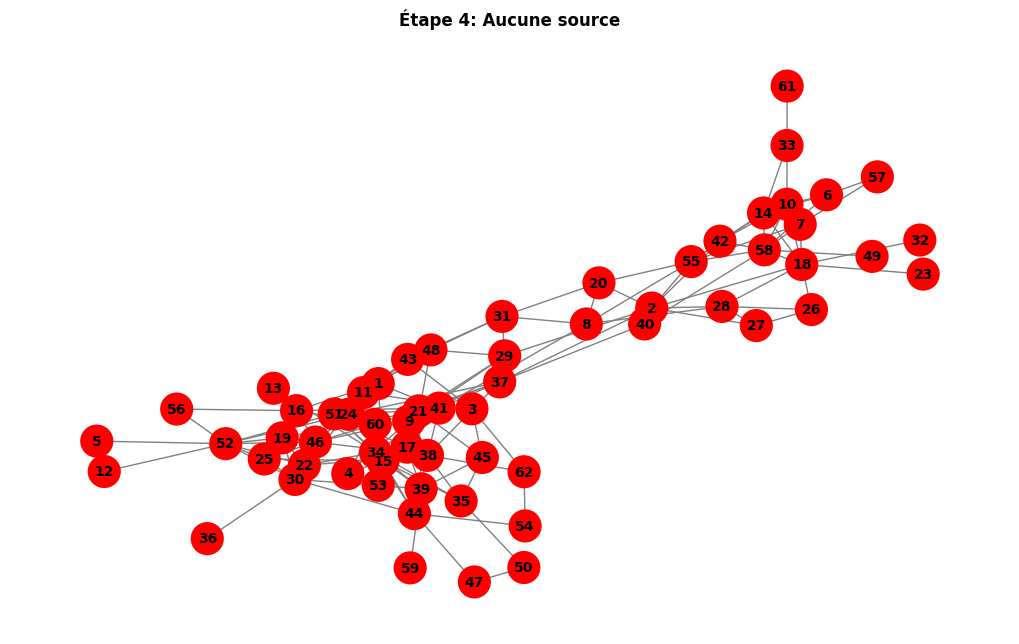

In [16]:
num = 3
visualiser_graphe_par_etape(graphes[df.iloc[num]["Graphe"]], [centre for centre, rayon in df.iloc[num]["Sequence Optimale"]])
#visualiser_graphe_par_etape(graphes[df.iloc[num]["Graphe"]], df.iloc[num]["Recherche Profondeur"])